In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

# Drop CustomerID
df.drop("CustomerID", axis=1, inplace=True)

# Optional: Drop 'Gender' or encode it
df.drop("Gender", axis=1, inplace=True)

# Display head
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

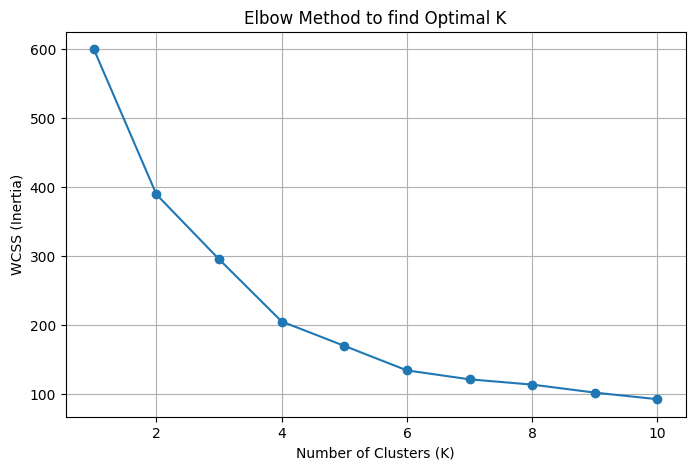

In [4]:
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.title("Elbow Method to find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.grid(True)
plt.show()

In [5]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to original DataFrame
df['Cluster'] = cluster_labels
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,3
3,23,16,77,2
4,31,17,40,2


In [6]:
score = silhouette_score(scaled_data, cluster_labels)
print("Silhouette Score for K=5:", score)

Silhouette Score for K=5: 0.40846873777345605


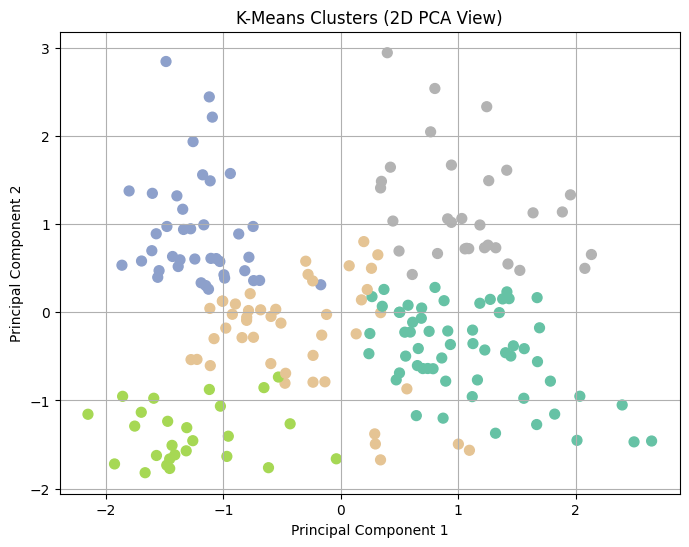

In [7]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot PCA components with clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='Set2', s=50)
plt.title("K-Means Clusters (2D PCA View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()